Historical
{'max_value': 397.546966552734, 'max_year': 2014, 'min_value': 276.272003173828, 'min_year': 1666}

SSP 1.9
{'max_value': 440.196991075526, 'max_year': 2041, 'min_value': 393.506011473137, 'min_year': 2100}

SSP 1.26
{'max_value': 473.998988799595, 'max_year': 2064, 'min_value': 399.949155879639, 'min_year': 2015}

SSP 2.45
{'max_value': 602.781984855873, 'max_year': 2100, 'min_value': 399.94909699401, 'min_year': 2015}

SSP 3.70
{'max_value': 867.190917951087, 'max_year': 2100, 'min_value': 399.948434987412, 'min_year': 2015}

SSP 5.85
{'max_value': 1135.20986904417, 'max_year': 2100, 'min_value': 399.948792080474, 'min_year': 2015}



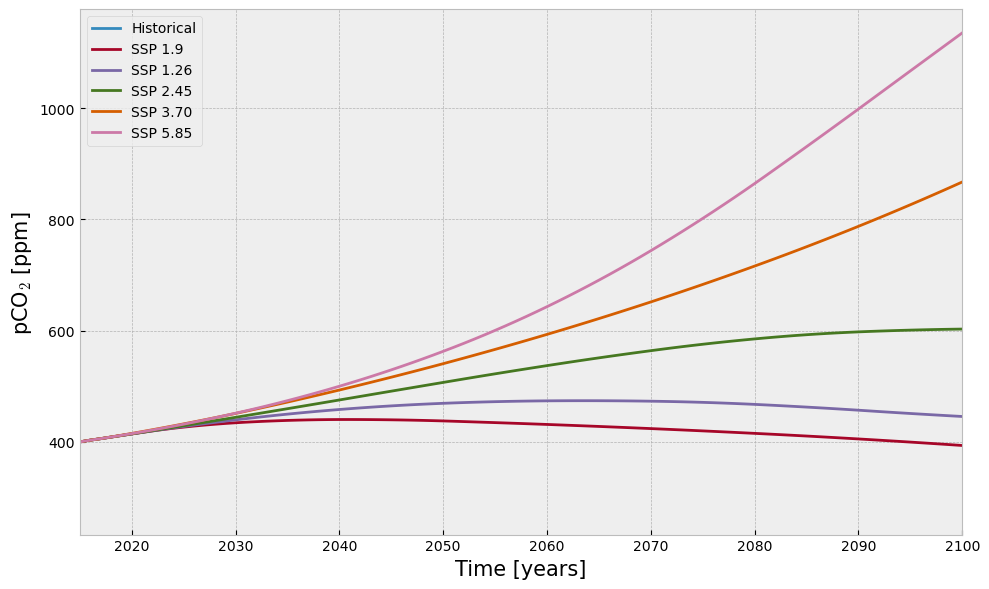

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set plot style
plt.style.use("bmh")

# Function to load and preprocess data
def load_data(file_path):
    df = pd.read_csv(file_path)
    df = df[["year", "data_mean_global"]][df["year"] <= 2100]
    return df

# Function to find max and min values
def find_max_min_values(df, data_column='data_mean_global', year_column='year'):
    max_value = df[data_column].max()
    min_value = df[data_column].min()
    max_year = df.loc[df[data_column].idxmax(), year_column]
    min_year = df.loc[df[data_column].idxmin(), year_column]
    return {'max_value': max_value, 'max_year': max_year, 'min_value': min_value, 'min_year': min_year}

# Paths to data files
file_paths = {
    "Historical": "../data/rf/historical.csv",
    "SSP 1.9": "../data/rf/IMAGE_ssp119.csv",
    "SSP 1.26": "../data/rf/IMAGE_ssp126.csv",
    "SSP 2.45": "../data/rf/MASSAGE_GLOBIOM_ssp245.csv",
    "SSP 3.70": "../data/rf/AIM_ssp370.csv",
    "SSP 5.85": "../data/rf/REMIND_MAGPIE_ssp585.csv"
}

# Load and process data
data_frames = {name: load_data(path) for name, path in file_paths.items()}

# Find max and min values for each dataset
stats = {name: find_max_min_values(df) for name, df in data_frames.items()}

# Print stats
for name, stat in stats.items():
    print(f"{name}\n{stat}\n")

# Plotting
plt.figure(figsize=(10, 6))
for name, df in data_frames.items():
    plt.plot(df["year"], df["data_mean_global"], label=name)
plt.legend(loc="upper left")
plt.xlim(df["year"].min(), 2100)
plt.xlabel("Time [years]", fontsize=15)
plt.ylabel(r"pCO$_2$ [ppm]", fontsize=15)
plt.tight_layout()
plt.savefig("../figs/fig2.png", dpi=400)

Historical statistics:
{'max_value': 397.546966552734, 'max_year': 2014, 'min_value': 276.272003173828, 'min_year': 1666}

SSP 1.19 statistics:
{'max_value': 440.196991075526, 'max_year': 2041, 'min_value': 393.506011473137, 'min_year': 2100}

SSP 1.26 statistics:
{'max_value': 473.998988799595, 'max_year': 2064, 'min_value': 399.949155879639, 'min_year': 2015}

SSP 2.45 statistics:
{'max_value': 602.781984855873, 'max_year': 2100, 'min_value': 399.94909699401, 'min_year': 2015}

SSP 3.70 statistics:
{'max_value': 867.190917951087, 'max_year': 2100, 'min_value': 399.948434987412, 'min_year': 2015}

SSP 5.85 statistics:
{'max_value': 1135.20986904417, 'max_year': 2100, 'min_value': 399.948792080474, 'min_year': 2015}



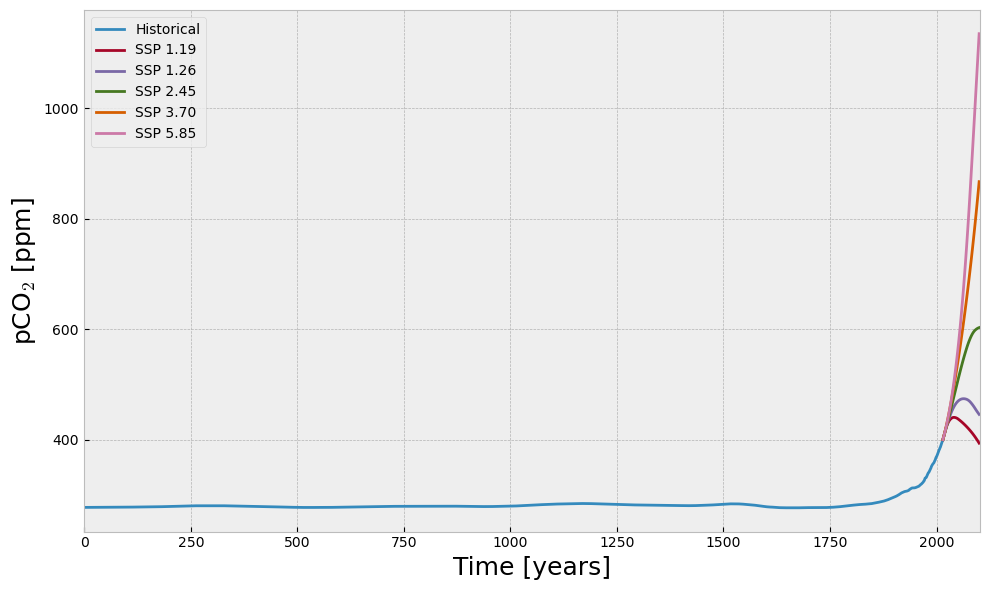

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("bmh")

class ClimateDataAnalyzer:
    """
    A class for analyzing and plotting climate data.
    """

    def __init__(self, file_paths):
        """
        Initializes the ClimateDataAnalyzer with file paths.

        Parameters:
            file_paths (dict): A dictionary mapping dataset names to file paths.
        """
        self.file_paths = file_paths
        self.data_frames = {}
        self.stats = {}

    def load_data(self, file_path):
        """
        Loads climate data from a CSV file and limits it to the year 2100.

        Parameters:
            file_path (str): The file path to load the data from.

        Returns:
            pd.DataFrame: The loaded and filtered data frame.
        """
        df = pd.read_csv(file_path, usecols=["year", "data_mean_global"])
        df = df[df["year"] <= 2100]  # Filter data to include only years up to 2100
        return df

    def find_max_min_values(self, df):
        """
        Finds the max and min values in the 'data_mean_global' column of a DataFrame.

        Parameters:
            df (pd.DataFrame): The data frame to analyze.

        Returns:
            dict: A dictionary with the max and min values and corresponding years.
        """
        max_value = df['data_mean_global'].max()
        min_value = df['data_mean_global'].min()
        max_year = df.loc[df['data_mean_global'].idxmax(), 'year']
        min_year = df.loc[df['data_mean_global'].idxmin(), 'year']
        return {'max_value': max_value, 'max_year': max_year, 'min_value': min_value, 'min_year': min_year}

    def process_data(self):
        """
        Loads and processes the data for each dataset specified in file_paths.
        """
        for name, path in self.file_paths.items():
            df = self.load_data(path)
            self.data_frames[name] = df
            self.stats[name] = self.find_max_min_values(df)

    def plot_data(self):
        """
        Plots the climate data for all datasets.
        """
        plt.figure(figsize=(10, 6))
        ax = plt.gca()  # Get the current axis

        for name, df in self.data_frames.items():
            ax.plot(df["year"], df["data_mean_global"], label=name)

        ax.legend(loc="upper left")
        ax.set_xlabel("Time [years]", fontsize=18)
        ax.set_ylabel(r"pCO$_2$ [ppm]", fontsize=18)
        plt.tight_layout()
        plt.xlim(-1, 2102)
        plt.savefig("../figs/fig2.png", dpi=400)

if __name__ == "__main__":
    file_paths = {
        "Historical": "../data/rf/historical.csv",
        "SSP 1.19": "../data/rf/IMAGE_ssp119.csv",
        "SSP 1.26": "../data/rf/IMAGE_ssp126.csv",
        "SSP 2.45": "../data/rf/MASSAGE_GLOBIOM_ssp245.csv",
        "SSP 3.70": "../data/rf/AIM_ssp370.csv",
        "SSP 5.85": "../data/rf/REMIND_MAGPIE_ssp585.csv"
    }

    analyzer = ClimateDataAnalyzer(file_paths)
    analyzer.process_data()
    analyzer.plot_data()

    # Print statistics, if necessary
    for name, stat in analyzer.stats.items():
        print(f"{name} statistics:\n{stat}\n")